# Mobile Ad Anti-Fraud Algorithm Challenge - Data Analysis (EDA)


-- Date:   03 Sep 2019  
-- Author:   Arianna.H

___

## Content:

- 0.Set configuration  
  
  
- 1.Explore on data  
1.1 Read data  
1.2 Shape and label distribution   
1.3 Feature description  
1.4 Identify missing value  
1.5 First glimpse of distribution of the data  
  
  
- 2.Data pre-process  
-fill missing value with existing columns/external data  
-clean punctuation/non-digit character/cases problem  
-timestamp\datatime\day\hour transformation  
-feature engineering by combining columns  
  
  
- 3.Data visualization  
-bar chart  
-line chart  
-subplotgrid  
  
  
- 4.Prepare dataset for modeling  
4.1 Correlation test for feature selection  
4.2 Label Encoding for non-numerical column  


___

## 0.Set Configuration

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #display multiple outputs in one cell
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import re  #Regular Expression
from datetime import datetime  #timestamp

import scipy.stats as stats  #for chi-square
from scipy.stats import chi2_contingency  #for chi-square
import seaborn as sns  #for ANOVA
from scipy import stats  #for ANOVA
import statsmodels  #for ANOVA
import statsmodels.api as sm  #for ANOVA
from statsmodels.formula.api import ols  #for ANOVA
from sklearn.preprocessing import LabelEncoder #label encoder

pd.set_option('display.max_columns', None)  #display all columns in dataframe
pd.set_option('display.max_rows', None)  #display all columns in dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


____

In [ ]:
!pip3 install numpy==1.22.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.Explore on dataset

### 1.1 Read data

In [ ]:
traindata = pd.read_csv('drive/My Drive/round1_iflyad_anticheat_traindata.txt',sep = '\t',encoding = 'utf-8')

traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sid           1000000 non-null  object 
 1   label         1000000 non-null  int64  
 2   pkgname       1000000 non-null  object 
 3   ver           678176 non-null   object 
 4   adunitshowid  1000000 non-null  object 
 5   mediashowid   1000000 non-null  object 
 6   apptype       1000000 non-null  float64
 7   nginxtime     1000000 non-null  float64
 8   ip            1000000 non-null  object 
 9   city          984807 non-null   object 
 10  province      1000000 non-null  float64
 11  reqrealip     1000000 non-null  object 
 12  adidmd5       1000000 non-null  object 
 13  imeimd5       1000000 non-null  object 
 14  idfamd5       1000000 non-null  object 
 15  openudidmd5   1000000 non-null  object 
 16  macmd5        1000000 non-null  object 
 17  dvctype       1000000 non-nu

### 1.2 Shape and label distribution  

In [ ]:
traindata.shape
# label distribution
traindata.label.value_counts(dropna=False)

(1000000, 29)

label
0    517106
1    482894
Name: count, dtype: int64

In [ ]:
traindata.head()

,sid,label,pkgname,ver,adunitshowid,mediashowid,apptype,nginxtime,ip,city,province,reqrealip,adidmd5,imeimd5,idfamd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi
0,d7460126-e071-4979-9ee8-42f72777a28a-156009070...,1,2d2664e827bcbb8b07100c7fbe072e9b,11.11.0,907d0f8c29663840491577a21c7b612a,ca64a500000d84c8fcb8a0587d0e1e0c,280.0,1.560091e+12,183.197.47.83,石家庄市,-1.0,180.76.181.7,eb4fa0cf77cdd57a6993a4e42c8fa4cf,930b3a8ecff4f586c63fec5b96693f32,empty,empty,ab96caaba2b7973e63fb0d3d5c5bf8b0,2.0,V1809A,vivo,2.0,46000.0,Android,8.1.0,0.0,zh-CN,2340.0,1080.0,3.0
1,b660d559-db97-4b5f-9bd2-2450cb89ce77-156005074...,1,empty,NaN,10199dc8fea2e173525bc3151bd84312,3f2fc57a6e1f9c6fa4464c25cc1e88a3,319.0,1.560051e+12,106.34.14.149,开封市,-1.0,47.95.111.138,a4ae6efcfaee62fb6da44a9c05753259,6e38deaa1f7b4118015c550bb21913d2,empty,a4ae6efcfaee62fb6da44a9c05753259,0f607264fc6318a92b9e13c65db7cd3c,2.0,BLA-AL00,HUAWEI,5.0,0.0,android,Android_9,0.0,NaN,1080.0,2040.0,0.0
2,f49a740e-66c3-4605-9b67-4d3079fe69cb-156008914...,0,16b81f93f4b1a35cebbf15f07683f171,3.2.1.0524.1958,83f2ecfe65f936f5f2ed59f8e8ff1d01,eea7280e1a2313e4c2e89290b01d196c,273.0,1.560089e+12,223.104.16.151,长春市,-1.0,39.96.159.155,3404f799628be2cf8fda7428aac2cca4,3fa42b06332c729f530b973973fabe3d,empty,empty,5ba1cf1efeee4f83e91f9c0adc3015e3,2.0,PBEM00,OPPO,2.0,46000.0,Android,8.1.0,1.0,zh-CN,2196.0,1080.0,0.0
3,fd60d096-f168-4540-b782-729d64d0fcc6-156006253...,0,empty,4.7.5,9f1eadd9092b19bc86ee0cacde1c867f,eec946a5a66c023ec9d3b2ede5900626,265.0,1.560063e+12,223.104.239.101,曲靖市,-1.0,47.101.65.230,941517d46b7261d98592425672bb86f5,04420edf96dde14c357db3e83d0b2310,empty,empty,empty,2.0,M711C,NaN,6.0,0.0,android,7.0,0.0,NaN,0.0,0.0,0.0
4,a037b032-a5c7-40ea-9161-26b118b12406-156007938...,1,cf4821986014a7fef9d7b7ad8de655e4,228,2af944462e43cd2f59acbbfd37445413,57b3053174973702549ba88b6017ac30,336.0,1.560079e+12,220.152.155.170,深圳市,-1.0,39.96.183.23,fc08a6724db4c2dcf9b5af3a4e0b6f38,23e94b65bab381bf57169149a20c0520,empty,empty,4363320019cbb7cde8b704908b673416,2.0,HUAWEI EML-AL00,EML-AL00,2.0,46000.0,Android,9,0.0,Zh-CN,2244.0,1080.0,0.0


**Remarks:** This indicates that no label imbalance exsits in train data.

### 1.3 Features description

* **label:**  
基本数据	label	int	是否作弊 (contains 1 and 0)    
    

* **features:**  
基本数据	sid	string	样本id/请求会话sid (unique identification for each request) 
时间	nginxtime	bigint	请求到达服务时间，单位ms (definition: request processing time in seconds with a milliseconds resolution; time elapsed between the first bytes were read from the client and the log write after the last bytes were sent to the client)  
媒体信息	adunitshowid	string	对外广告位ID（MD5加密）    
媒体信息	mediashowid	string	对外媒体ID（MD5加密）       
媒体信息	pkgname	string	包名(MD5加密) 
媒体信息	apptype	int	app所属分类    
媒体信息	ver	string	app版本    
IP信息	ip	string	客户端IP地址    
IP信息	reqrealip	string	请求的http协议头携带IP，有可能是下游服务器的ip  
IP信息	city	string	城市     
IP信息	province	string	省份   
设备信息	make	string	厂商  
设备信息	model	string	机型  
设备信息	adidmd5	string	Adroid ID的MD5值  
设备信息	imeimd5	string	imei的MD5值  
设备信息	idfamd5	string	idfa的MD5值  
设备信息	openudidmd5	string	openudid的MD5值  
设备信息	macmd5	string	mac的MD5值  
设备信息	os	string	操作系统 : Android, iOS  
设备信息	osv	string	操作系统版本  
设备信息	dvctype	int	设备类型 0 – 未知,1 – PC,2 – 手机, 3– 平板,4– 电视盒,5– 智能电视,6 – 可穿戴设备,7 – 智能家电,8 - 音箱,9 - 智能硬件    
设备信息	ntt	int	网络类型 0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G    
设备信息	carrier	string	运营商 0-未知, 46000-移动, 46001-联通, 46003-电信    
设备信息	lan	string	语言  
设备信息	orientation	int	横竖屏:0竖屏，1横屏   
设备信息	h	int	设备高    
设备信息	w	int	设备宽  
设备信息	ppi	int	屏幕密度  

### 1.4 Identify missing value and 'empty' values  

In [ ]:
## identify the columns with missing values 
def get_missing_columns():
    missing_df = traindata.isna().sum(axis=0).to_frame()
    missing_df = missing_df.reset_index().rename(columns = {0:"missing_count"})
    missing_df = missing_df.sort_values("missing_count", ascending = False)
    missing_df = missing_df[missing_df["missing_count"] > 0]
    return missing_df


get_missing_columns()

,index,missing_count
25,lan,367527
3,ver,321824
19,make,123839
9,city,15193
23,osv,12997
18,model,4467


In [ ]:
## fill missing values
def cols_to_fix():
    for c in traindata.columns:
        if traindata[c].dtype == "object":
            traindata[c] = traindata[c].fillna("nan")
        else:
            traindata[c] = traindata[c].fillna(0.0)

cols_to_fix()

### 1.5 First glimpse of distribution of the data

To analyze the dataset, we need to explore the correlation between the features and the label. Since many of the features are strings, we can check the correlation in an indiract way by looking into the distribution of label counts or label percentage of the features' unique values. 

Split train data into label_1 and label_0 to check if distributions of variables change due to diffenrent labels.  

In [ ]:
label_1 = traindata.loc[traindata.label==1,:]
label_0 = traindata.loc[traindata.label==0,:]
label_1.os.value_counts(normalize=True,dropna=False).head()
label_0.os.value_counts(normalize=True,dropna=False).head()

os
Android    0.501831
android    0.498169
Name: proportion, dtype: float64

os
android    0.708437
Android    0.291563
Name: proportion, dtype: float64

Here, I clustered the features by degree of correlation between predictor variables and target variable:   
  
* **HIGH importance:**  
'ver':  large percentage(1st: 40%), large distribution difference(1st: ±30%) => HIGH importance   
'apptype':  large percentage(1st: 30%), large difference(1st: ±30%) => HIGH importance  
'dvctype':  large percentage('2'takes up 90%), large difference(1st: ±20%) => HIGH importance  
'make':  large percentage(1st: 30%), large difference(1st: ±30%) => HIGH importance  
'os':  large percentage(1st: 70%), large difference(1st & 2nd: ±20%) => HIGH importance  
'orientation':  large percentage(1st: 80%), large difference(1st & 2nd: ±20%) => HIGH importance  
'lan':  large percentage(1st: 60%), large difference(1st: ±40%) => HIGH importance  
'h':  large percentage(1st: 30%), large difference(1st: ±20%) => HIGH importance  
'pkgname': large percetage('empty'takes up 30%), large difference(2nd: ±30%) => HIGH importance    
'mediashowid': large percetage(1st: 30%), large difference(1st: ±30%) => HIGH importance    
   
   
* **MEDIUM importance:**    
'osv':  large percentage(1st: 30%), medium differences(1st & 2nd: ±10%) => MEDIUM importance  
'reqrealip':  medium percentage(1st: 10%), medium difference(1st: ±10%) => MEDIUM importance    
'adidmd5': large percetage('empty': 30%), medium difference(1st: ±10%) => MEDIUM importance    
'macmd5': large percetage('empty': 30%), medium difference(1st: ±10%) => MEDIUM importance  
'ntt':  large percetage(1st: 60%), small difference(3rd ±10%) => MEDIUM importance   
'carrier':  large percetage(1st: 70%), small difference(2nd ±7%) => MEDIUM importance   
'w': large percentage(1st: 40%),  medium difference(2nd ±20%) => MEDIUM importance  
   
   
* **LOW importance:** *(consider to increase their correlations by feature engineering)*    
'ip':  small percentage(1st: 0.3%), almost no difference(after top 5: ±0.2%) => LOW importance   
'city':  small percentage(1st: 3%), almost no difference(4th: ±2%) => LOW importance   
'province':  large percentage('-1' takes up 90%), almost no difference(after top 5: ±0.2%) => LOW importance   
'model':  small percentage(1st: 2%), small difference(2rd ±0.8%) => LOW importance   
'ppi':  large percentage(1st: 70%), almost on difference in top 5 values(after top 5: ±0.4%) => LOW importance  
'adunitshowid': small percetage(1st: 8%), small difference(unique value vary) => LOW importance     
'imeimd5': small percentage(1st: 1%) and difference(1st: ±1%) => LOW importance     
'idfamd5', 'openudidmd5': large percentage('empty'takes up 90%) with very small difference(1st: ±5%,others: ±0.01%) => LOW importance     
'nginxtime': timestamp(very sparse) => LOW importance     

___

## 2. Data pre-process

This dataset is a great example for you to practice your data cleaning skills, because it contains various forms of data, e.g. floating numbers, timestamp, strings, Chinese/English characters, alphabets in upper/lower cases, etc. Get your hands dirty ;)

#### Data Cleaning:  
For string data ['city','province' 'model', 'make', 'lan']: clean disordered characters/cases/punctuations and try to fill null values  
For timeseries data ['nginxtime']: transform it into datatime form    
For numeric data ['apptype','h','w','ppi']: clean non-digit and set null values to 0   
For ip/version data ['ip', 'reqrealip', 'ver','osv']: clean punctuations  
For id data ['pkgname', 'adunitshowid', 'mediashowid', 'adidmd5', 'imeimd5', 'idfamd5', 'openudidmd5', 'macmd5']: clean punctuations  and extact top 3 digits  


#### Feature engineering:  
['h_w','hw_ratio','inch']: use 'h','w','ppi' to calculate device size, ratio and inch  
['apptype_top1', 'apptype_top2']: extract top 1, 2 digits, convert 'apptype_top2' to int  
['osv_top1', 'osv_top2', 'osv_top3']:  extract top 1, 2, 3 digits, convert 'osv_top2', 'osv_top3' to int  
['ip_top', 'reqrealip_top']: extract top 1 string after splitting and convert them to integer  
['date','dayofweek','hour','hourtominute','hourtosecond']: extract different types of time values from datatime

#### 2.1 fill na value of 'province' with external data containing city-province information using mapping

In [ ]:
import pandas as pd

# Read in the province_city.csv file and extract the relevant columns
province = pd.read_csv('drive/My Drive/province_city.csv', usecols=[0, 1, 3])
province.columns = ['province', 'city', 'Disposable Income']

# Calculate the median income
median_income = province['Disposable Income'].median()



In [ ]:
# Import external data
import pandas as pd

province = pd.read_csv('drive/My Drive/province_city.csv', usecols=[0,1,3])


province.columns = ['province', 'city', 'Disposable Income']

# Create a dictionary for mapping
mydict = dict(zip(province.city, province.province))

# Map the cities to their respective provinces
traindata['province'] = traindata['city'].map(mydict).fillna("nan")

# Calculate the median income
median_income = province['Disposable Income'].median()

# Create a new column 'income_label' to label provinces as high or low income
province['income_label'] = province['Disposable Income'].apply(lambda x: 'high income' if x > median_income else 'low income')

province.head()

,province,city,Disposable Income,income_label
0,Beijing,北京市,77415,high income
1,Beijing,北京市,77415,high income
2,Beijing,北京市,77415,high income
3,Beijing,北京市,77415,high income
4,Beijing,北京市,77415,high income


In [ ]:
# Import external data
province = pd.read_csv('drive/My Drive/province_city.csv', usecols=[0,1,3])
province.columns = ['province', 'city', 'Disposable Income']

# Calculate the median income
median_income = province['Disposable Income'].median()

# Create a dictionary mapping the province to the income label
income_label_dict = dict(zip(province['province'], province['Disposable Income'].apply(lambda x: 'high income' if x > median_income else 'low income')))

# Add the income_label column to the traindata DataFrame using map
traindata['income_label'] = traindata['province'].map(income_label_dict).fillna('unknown')

# Check the first few rows of the updated traindata dataframe
traindata.head()

,sid,label,pkgname,ver,adunitshowid,mediashowid,apptype,nginxtime,ip,city,province,reqrealip,adidmd5,imeimd5,idfamd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi,income_label
0,d7460126-e071-4979-9ee8-42f72777a28a-156009070...,1,2d2664e827bcbb8b07100c7fbe072e9b,11.11.0,907d0f8c29663840491577a21c7b612a,ca64a500000d84c8fcb8a0587d0e1e0c,280.0,1.560091e+12,183.197.47.83,石家庄市,Hebei,180.76.181.7,eb4fa0cf77cdd57a6993a4e42c8fa4cf,930b3a8ecff4f586c63fec5b96693f32,empty,empty,ab96caaba2b7973e63fb0d3d5c5bf8b0,2.0,V1809A,vivo,2.0,46000.0,Android,8.1.0,0.0,zh-CN,2340.0,1080.0,3.0,low income
1,b660d559-db97-4b5f-9bd2-2450cb89ce77-156005074...,1,empty,nan,10199dc8fea2e173525bc3151bd84312,3f2fc57a6e1f9c6fa4464c25cc1e88a3,319.0,1.560051e+12,106.34.14.149,开封市,Henan,47.95.111.138,a4ae6efcfaee62fb6da44a9c05753259,6e38deaa1f7b4118015c550bb21913d2,empty,a4ae6efcfaee62fb6da44a9c05753259,0f607264fc6318a92b9e13c65db7cd3c,2.0,BLA-AL00,HUAWEI,5.0,0.0,android,Android_9,0.0,nan,1080.0,2040.0,0.0,low income
2,f49a740e-66c3-4605-9b67-4d3079fe69cb-156008914...,0,16b81f93f4b1a35cebbf15f07683f171,3.2.1.0524.1958,83f2ecfe65f936f5f2ed59f8e8ff1d01,eea7280e1a2313e4c2e89290b01d196c,273.0,1.560089e+12,223.104.16.151,长春市,Jilin,39.96.159.155,3404f799628be2cf8fda7428aac2cca4,3fa42b06332c729f530b973973fabe3d,empty,empty,5ba1cf1efeee4f83e91f9c0adc3015e3,2.0,PBEM00,OPPO,2.0,46000.0,Android,8.1.0,1.0,zh-CN,2196.0,1080.0,0.0,low income
3,fd60d096-f168-4540-b782-729d64d0fcc6-156006253...,0,empty,4.7.5,9f1eadd9092b19bc86ee0cacde1c867f,eec946a5a66c023ec9d3b2ede5900626,265.0,1.560063e+12,223.104.239.101,曲靖市,Yunnan,47.101.65.230,941517d46b7261d98592425672bb86f5,04420edf96dde14c357db3e83d0b2310,empty,empty,empty,2.0,M711C,nan,6.0,0.0,android,7.0,0.0,nan,0.0,0.0,0.0,low income
4,a037b032-a5c7-40ea-9161-26b118b12406-156007938...,1,cf4821986014a7fef9d7b7ad8de655e4,228,2af944462e43cd2f59acbbfd37445413,57b3053174973702549ba88b6017ac30,336.0,1.560079e+12,220.152.155.170,深圳市,Guangdong,39.96.183.23,fc08a6724db4c2dcf9b5af3a4e0b6f38,23e94b65bab381bf57169149a20c0520,empty,empty,4363320019cbb7cde8b704908b673416,2.0,HUAWEI EML-AL00,EML-AL00,2.0,46000.0,Android,9,0.0,Zh-CN,2244.0,1080.0,0.0,high income


In [ ]:
label_1 = traindata.loc[traindata.label==1,:]
label_0 = traindata.loc[traindata.label==0,:]
label_1.province.value_counts(normalize=True,dropna=False).head()
label_0.province.value_counts(normalize=True,dropna=False).head()

province
Guangdong    0.089094
Jiangsu      0.083905
Shandong     0.066762
nan          0.056557
Henan        0.055822
Name: proportion, dtype: float64

province
Guangdong    0.090815
Jiangsu      0.073573
Henan        0.064776
Zhejiang     0.057977
nan          0.055428
Name: proportion, dtype: float64

In [ ]:
traindata.head()

,sid,label,pkgname,ver,adunitshowid,mediashowid,apptype,nginxtime,ip,city,province,reqrealip,adidmd5,imeimd5,idfamd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi,income_label
0,d7460126-e071-4979-9ee8-42f72777a28a-156009070...,1,2d2664e827bcbb8b07100c7fbe072e9b,11.11.0,907d0f8c29663840491577a21c7b612a,ca64a500000d84c8fcb8a0587d0e1e0c,280.0,1.560091e+12,183.197.47.83,石家庄市,Hebei,180.76.181.7,eb4fa0cf77cdd57a6993a4e42c8fa4cf,930b3a8ecff4f586c63fec5b96693f32,empty,empty,ab96caaba2b7973e63fb0d3d5c5bf8b0,2.0,V1809A,vivo,2.0,46000.0,Android,8.1.0,0.0,zh-CN,2340.0,1080.0,3.0,low income
1,b660d559-db97-4b5f-9bd2-2450cb89ce77-156005074...,1,empty,nan,10199dc8fea2e173525bc3151bd84312,3f2fc57a6e1f9c6fa4464c25cc1e88a3,319.0,1.560051e+12,106.34.14.149,开封市,Henan,47.95.111.138,a4ae6efcfaee62fb6da44a9c05753259,6e38deaa1f7b4118015c550bb21913d2,empty,a4ae6efcfaee62fb6da44a9c05753259,0f607264fc6318a92b9e13c65db7cd3c,2.0,BLA-AL00,HUAWEI,5.0,0.0,android,Android_9,0.0,nan,1080.0,2040.0,0.0,low income
2,f49a740e-66c3-4605-9b67-4d3079fe69cb-156008914...,0,16b81f93f4b1a35cebbf15f07683f171,3.2.1.0524.1958,83f2ecfe65f936f5f2ed59f8e8ff1d01,eea7280e1a2313e4c2e89290b01d196c,273.0,1.560089e+12,223.104.16.151,长春市,Jilin,39.96.159.155,3404f799628be2cf8fda7428aac2cca4,3fa42b06332c729f530b973973fabe3d,empty,empty,5ba1cf1efeee4f83e91f9c0adc3015e3,2.0,PBEM00,OPPO,2.0,46000.0,Android,8.1.0,1.0,zh-CN,2196.0,1080.0,0.0,low income
3,fd60d096-f168-4540-b782-729d64d0fcc6-156006253...,0,empty,4.7.5,9f1eadd9092b19bc86ee0cacde1c867f,eec946a5a66c023ec9d3b2ede5900626,265.0,1.560063e+12,223.104.239.101,曲靖市,Yunnan,47.101.65.230,941517d46b7261d98592425672bb86f5,04420edf96dde14c357db3e83d0b2310,empty,empty,empty,2.0,M711C,nan,6.0,0.0,android,7.0,0.0,nan,0.0,0.0,0.0,low income
4,a037b032-a5c7-40ea-9161-26b118b12406-156007938...,1,cf4821986014a7fef9d7b7ad8de655e4,228,2af944462e43cd2f59acbbfd37445413,57b3053174973702549ba88b6017ac30,336.0,1.560079e+12,220.152.155.170,深圳市,Guangdong,39.96.183.23,fc08a6724db4c2dcf9b5af3a4e0b6f38,23e94b65bab381bf57169149a20c0520,empty,empty,4363320019cbb7cde8b704908b673416,2.0,HUAWEI EML-AL00,EML-AL00,2.0,46000.0,Android,9,0.0,Zh-CN,2244.0,1080.0,0.0,high income


#### 2.2 fill null values of 'make' with corresponding values in 'model' column

In [ ]:
traindata.make = traindata.make.str.upper()
traindata.model = traindata.model.str.upper()
traindata.make = np.where((traindata.model.str.contains('OPPO') | 
                            traindata.model.str.contains(r'P.+[00]$',regex=True)),'OPPO',traindata.make)
traindata.make = np.where((traindata.model.str.contains('VIVO') |
                            traindata.model.str.contains(r'^V.+[A-Z]$',regex=True)),'VIVO',traindata.make)
traindata.make = np.where((traindata.model.str.contains('HUAWEI') | 
                             traindata.model.str.contains(r'-AL',regex=True) | 
                             traindata.model.str.contains(r'-TL',regex=True) |
                             traindata.make.str.contains('华为')),'HUAWEI',traindata.make)
traindata.make = np.where((traindata.make.str.contains('360手机') |
                            traindata.model.str.contains(r'^\d.+[-A].+\d$',regex=True) |
                            traindata.model.str.contains(r'^\d.+[-M].+\d$',regex=True)),'360',traindata.make)
traindata.make = np.where((traindata.make.str.contains('金立') |
                            traindata.model.str.contains('GIONEE') |
                            traindata.model.str.contains('S9')),'GIONEE',traindata.make)
traindata.make = np.where((traindata.model.str.contains('SM') |
                             traindata.make.str.contains('三星')),'SAMSUNG',traindata.make)
traindata.make = np.where((traindata.model.str.contains('MI') |
                             traindata.make.str.contains('小米')),'XIAOMI',traindata.make)
traindata.make = np.where(traindata.make.str.contains('荣耀'),'HONOR',traindata.make)
traindata.make = np.where((traindata.model.str.contains('MEIZU') | 
                            traindata.model.str.contains('16TH') |
                            traindata.model.str.contains(r'^M\d+',regex=True) |
                            traindata.make.str.contains('魅族')),'MEIZU',traindata.make)
traindata.make = np.where(traindata.make.str.contains('努比亚'),'NUBIA',traindata.make)
traindata.make = np.where((traindata.model.str.contains('COOLPAD') | 
                            traindata.make.str.contains('酷派')),'COOLPAD',traindata.make)
traindata.make = np.where((traindata.model.str.contains(r'^O.+\d$',regex=True) | 
                            traindata.make.str.contains('锤子')),'SMARTISAN',traindata.make)
traindata.make = np.where((traindata.make.str.contains('百立丰') |
                            traindata.model.str.contains('LEPHONE')),'LEPHONE',traindata.make)
traindata.make = np.where(traindata.make.str.contains('中兴'),'ZTE',traindata.make)
traindata.make = np.where(traindata.make.str.contains('联想'),'LENOVO',traindata.make)
traindata.make = np.where((traindata.make.str.contains('海信') |
                            traindata.model.str.contains('HISENSE')),'HISENSE',traindata.make)
traindata.make = np.where(traindata.model.str.contains('YU FLY F9'),'YUPLY',traindata.make) 

#### 2.3  clean 'lan' column: case, punctuation, character 

In [ ]:
def get_lan(x):
    if x =="zh_":
        return "zh"
    elif x =="fr":
        return "others"
    elif x =="kr":
        return "others"
    elif x =="in_id":
        return "others"
    elif x =="mi":
        return "others"
    elif x =="zh_mo":
        return "others"
    elif x =="de":
        return "others"
    elif x =="th_th":
        return "others"
    else:
        return x

In [ ]:
traindata.lan = traindata.lan.str.lower().str.replace('-','_')
traindata.lan = np.where(traindata.lan.str.contains('cn'),'zh_cn',traindata.lan)
traindata.lan = np.where(traindata.lan.str.contains('tw'),'zh_tw',traindata.lan)
traindata.lan = np.where(traindata.lan.str.contains('hk'),'zh_hk',traindata.lan)
traindata.lan = np.where(traindata.lan.str.contains('us'),'en_us',traindata.lan)
traindata.lan = traindata.lan.apply(lambda x: get_lan(x))

#### 2.4 transform 'nginxtime' from timestamp to datatime, and create different time dimensions: date, day of week, hour, minute, hourtosecond

In [ ]:
traindata['nginxtime_clean'] = pd.to_datetime(traindata.nginxtime, unit='ms')
traindata['date'] = traindata.nginxtime_clean.apply(lambda x: x.day)
traindata['dayofweek'] = traindata.nginxtime_clean.apply(lambda x: x.isoweekday())
traindata['hour'] = traindata.nginxtime_clean.apply(lambda x: x.hour)
traindata['minute'] = traindata.nginxtime_clean.apply(lambda x: x.minute)
traindata['hourtosecond'] = traindata.nginxtime_clean.apply(lambda x: x.strftime('%H%M%S')).astype(int)

#### 2.5 Clean and extract first few digits of 'ip', 'reqrealip', apptype'

Suspicious ip:   
127.0.0.1 本机地址-测试 => all label1  
18.219.51.149 美国 哥伦比亚 => all label1  
192.168.(0.100) 本地局域网 => 90% label1  
10.(130.113.70) 本地局域网 => 90% label1  

This indicates that the top one or two parts before the punctuation '.' of ip can represent specific locations.

In [ ]:
#'ip'
traindata['ip_top'] = np.where(traindata['ip'].str.contains(':'),'0.',traindata['ip'])
traindata['ip_top'] = traindata['ip_top'].apply(lambda x: x.split('.')[0]).astype(int)

#'reqrealip_top'
traindata['reqrealip_top'] = traindata['reqrealip'].apply(lambda x: x.split('.')[0]).astype(int)

#'apptype'
traindata['apptype_top1'] = traindata['apptype'].apply(lambda x: str(x)[0:1]).apply(lambda x: np.where(x=='-',0,x)).astype(int)
traindata['apptype_top2'] = traindata['apptype'].apply(lambda x: str(x)[0:2]).astype(int)

#### 2.6 Use h, w, ppi to create new features 'h_w' (size), 'hw_ratio', 'inch'

In [ ]:
traindata['h_w'] = round((traindata.h * traindata.w),1)
traindata['hw_ratio'] = round(traindata.h / traindata.w,1)
traindata['hw_ratio'] = traindata['hw_ratio'].fillna(0.0)
traindata['inch'] = np.where(traindata.ppi==0.0, 0.0, round(np.sqrt(traindata.h**2 + traindata.w**2) / traindata.ppi,1))

#### 2.7 remove non-digit characters in  'osv', 'ver', extract top few digits

In [ ]:
# remove all non-digit characters
def clean_punctuation(x):
    x = re.sub("\D", "", x)
    if x=='':
        return '0'
    else:
        return x

In [ ]:
#'osv'
traindata['osv_clean'] = traindata['osv'].astype(str).apply(lambda x: clean_punctuation(x))
traindata['osv_top1'] = traindata['osv_clean'].apply(lambda x: x[0:1]).astype(int)
traindata['osv_top2'] = traindata['osv_clean'].apply(lambda x: x[0:2]).astype(int)
traindata['osv_top3'] = traindata['osv_clean'].apply(lambda x: x[0:3]).astype(int)

#'ver' 
traindata['ver_clean'] = traindata['ver'].apply(lambda x: clean_punctuation(x))
traindata['ver_top1'] = traindata['ver_clean'].apply(lambda x: x[0:1]).astype(int)
traindata['ver_top2'] = traindata['ver_clean'].apply(lambda x: x[0:2]).astype(int)
traindata['ver_top3'] = traindata['ver_clean'].apply(lambda x: x[0:3]).astype(int)

#### 2.8 remove alphabets in 'id' like columns, extract top 3 digits

* The columns that contain 'Empty' values:   
pkgname    263239  
adunitshowid    296  
mediashowid    296  
adidmd5    254158  
imeimd5    6868  
idfamd5    999641  
openudidmd5    918400  
macmd5    418236  

In [ ]:
# id_column = ['pkgname','adunitshowid','mediashowid','adidmd5','imeimd5','openudidmd5','macmd5']
# for i in id_column:
#     traindata[i] = traindata[i].apply(lambda x: clean_punctuation(x)).apply(lambda x: x[0:3]).astype(int)

___

## 3. Data Visualization
have fun with plotting:D

In [ ]:
label_1 = traindata.loc[traindata.label==1,:]
label_0 = traindata.loc[traindata.label==0,:]

#### make : Plot make distribution

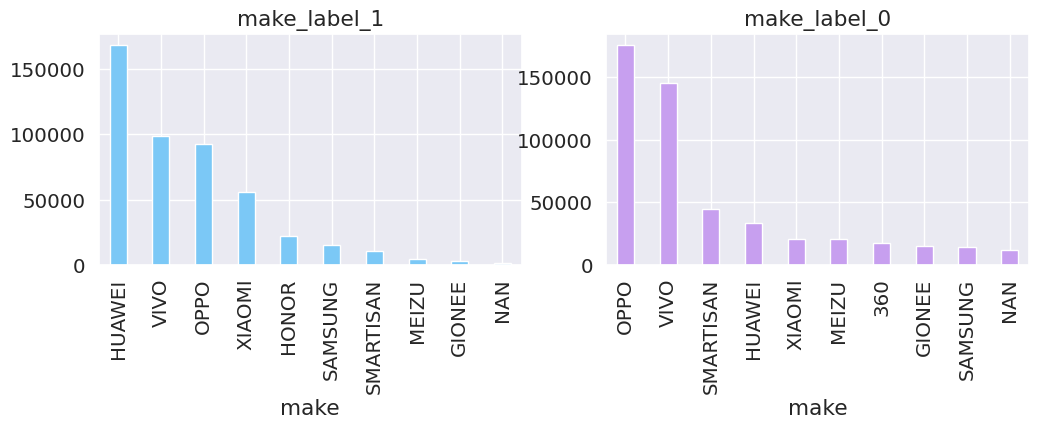

In [ ]:
import matplotlib.pyplot as plt  #plot

# '_ =' to ignore unwanted output
fig = plt.figure()
_ = fig.set(alpha=0.5)
fig.set_size_inches(12,3)
_ = plt.subplot2grid((1,2),(0,0))
_ = label_1.make.value_counts().head(10).plot.bar(width=0.4, color='xkcd:lightblue')
_ = plt.title(u"make_label_1")
_ = plt.subplot2grid((1,2),(0,1))
_ = label_0.make.value_counts().head(10).plot.bar(width=0.4, color='xkcd:lavender')
_ = plt.title(u"make_label_0")

#### lan : Plot language distribution

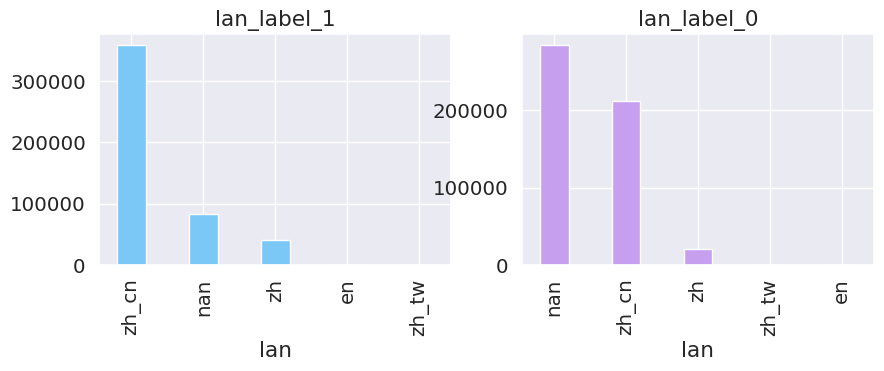

In [ ]:
fig = plt.figure()
_ = fig.set(alpha=0.5)
fig.set_size_inches(10,3)
_ = plt.subplot2grid((1,2),(0,0))
_ = label_1.lan.value_counts().head().plot.bar(width=0.4, color='xkcd:lightblue')
_ = plt.title(u"lan_label_1")
_ = plt.subplot2grid((1,2),(0,1))
_ = label_0.lan.value_counts().head().plot.bar(width=0.4, color='xkcd:lavender')
_ = plt.title(u"lan_label_0")

#### nginxtime : Plot label distribution per day of a week and per hour

In [ ]:
dayofweek_df = pd.DataFrame(columns = ['dayofweek','label_1', 'label_0', 'label_all', 'label_1_%','label_0_%'])
dayofweek_df['dayofweek'] = traindata.dayofweek.sort_values().unique()
dayofweek_df['label_1'] = traindata[traindata['label']==1].dayofweek.value_counts().sort_index().tolist()
dayofweek_df['label_0'] = traindata[traindata['label']==0].dayofweek.value_counts().sort_index().tolist()
dayofweek_df['label_all'] = dayofweek_df['label_1']+dayofweek_df['label_0']
dayofweek_df['label_1_%'] = dayofweek_df['label_1']/dayofweek_df['label_all']
dayofweek_df['label_0_%'] = dayofweek_df['label_0']/dayofweek_df['label_all']

In [ ]:
hour_df = pd.DataFrame(columns = ['hour','label_1', 'label_0', 'label_all', 'label_1_%','label_0_%'])
hour_df['hour'] = traindata.hour.sort_values().unique()
hour_df['label_1'] = traindata.loc[traindata['label']==1].hour.value_counts().sort_index().tolist()
hour_df['label_0'] = traindata.loc[traindata['label']==0].hour.value_counts().sort_index().tolist()
hour_df['label_all'] = hour_df['label_1']+hour_df['label_0']
hour_df['label_1_%'] = hour_df['label_1']/hour_df['label_all']
hour_df['label_0_%'] = hour_df['label_0']/hour_df['label_all']

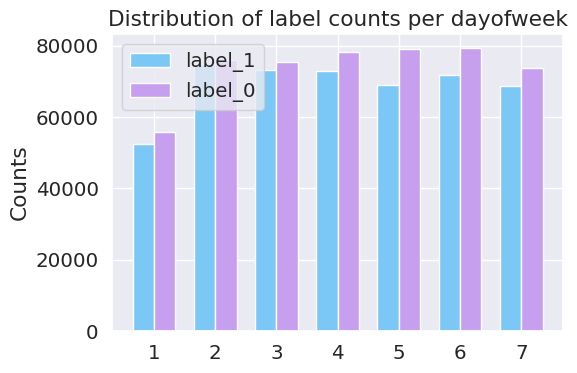

In [ ]:
x = np.arange(len(dayofweek_df['dayofweek']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
_ = rects1 = ax.bar(x - width/2, dayofweek_df['label_1'], width, label='label_1', color='xkcd:lightblue')
_ = rects2 = ax.bar(x + width/2, dayofweek_df['label_0'], width, label='label_0', color='xkcd:lavender')

# Add some text for labels, title and custom x-axis tick labels, etc.
_ = ax.set_ylabel('Counts')
_ = ax.set_title('Distribution of label counts per dayofweek')
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(dayofweek_df['dayofweek'])
_ = ax.legend()

fig.tight_layout()
plt.show()

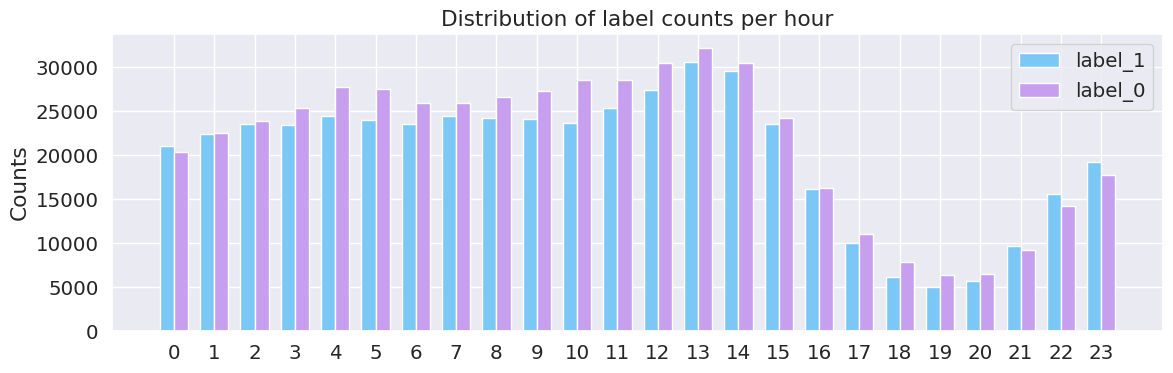

In [ ]:
x = np.arange(len(hour_df['hour']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12,4)
_ = rects1 = ax.bar(x - width/2, hour_df['label_1'], width, label='label_1', color='xkcd:lightblue')
_ = rects2 = ax.bar(x + width/2, hour_df['label_0'], width, label='label_0', color='xkcd:lavender')

# Add some text for labels, title and custom x-axis tick labels, etc.
_ = ax.set_ylabel('Counts')
_ = ax.set_title('Distribution of label counts per hour')
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(hour_df['hour'])
_ = ax.legend()

fig.tight_layout()
plt.show()

**Remarks:**

The graphs are more intuitive to show the relationships. We can see obviously that there are several features contributing to label 0(if we assume that label 0 refers to fraud)

The first two pictures show that fraud behaviour concentrates in OPPO and VIVO, meaning that phones made by these two manufactures are more easily to be made use of in terms of faking ip or others.

The second two bar charts show that the suspicious behaviour usually coincides with not defined language, says 'nan', and in general the normal behaviour will display 'chinese' as the language.  

Other graphs indicate that the probability of ad fraud changes with hour and day of a week.

___

## 4. Prepare Dataset for modeling
### 4.1 Correlation significant test  for feature selection  

- #### Chi Square Analysis   

Simple correlation test using DateFrame.corr() can only be used in tesing between continuous variables. Given that our label is nominal and so are many independent variables, we use Chi Square analysis to test the correlation between them: According to the P value results, 'sid' and 'idfamd5' are uncorrelated features which should be discarded.

In [ ]:
## Feature Selection    
# traindata.columns
# traindata.dtypes == 'object'

nominalColumns = [ 'sid', 'pkgname', 'ver', 'adunitshowid', 'mediashowid',
       'apptype', 'ip', 'city', 'province', 'reqrealip',
       'adidmd5', 'imeimd5', 'idfamd5', 'openudidmd5', 'macmd5', 'dvctype',
       'model', 'make', 'ntt', 'carrier', 'os', 'osv', 'orientation', 'lan',
       'date', 'dayofweek', 'hour',
       'minute', 'hourtosecond', 'ip_top', 'reqrealip_top', 'apptype_top1',
       'apptype_top2', 'osv_clean', 'osv_top1',
       'osv_top2', 'osv_top3', 'ver_clean', 'ver_top1', 'ver_top2',
       'ver_top3','income_label']

In [ ]:
## Introduce ChiSquare Class     

print('Staring testing...')
class ChiSquare:
    def __init__(self, dataframe):
        
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None  #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{} - IMPORTANT predictor. Chi-Statistic: {:.2f}, P-value: {:.4f}".format(colX,self.chi2,self.p) 
        else:
            result="{} - NOT important predictor. Chi-Statistic: {:.2f}, P-value: {:.4f}  ==>  Discard".format(colX,self.chi2,self.p)

        print(result)
        
    def TestIndependence(self, colX, colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved =  pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        self._print_chisquare_result(colX,alpha)
        
        
## Initialize ChiSquare Class   
   
cT = ChiSquare(traindata)

for var in nominalColumns:
    cT.TestIndependence(colX=var, colY='label')

Staring testing...
sid - NOT important predictor. Chi-Statistic: 1000000.00, P-value: 0.4995  ==>  Discard
pkgname - IMPORTANT predictor. Chi-Statistic: 407817.87, P-value: 0.0000
ver - IMPORTANT predictor. Chi-Statistic: 395837.76, P-value: 0.0000
adunitshowid - IMPORTANT predictor. Chi-Statistic: 552043.97, P-value: 0.0000
mediashowid - IMPORTANT predictor. Chi-Statistic: 500428.72, P-value: 0.0000
apptype - IMPORTANT predictor. Chi-Statistic: 362222.62, P-value: 0.0000
ip - IMPORTANT predictor. Chi-Statistic: 787269.08, P-value: 0.0000
city - IMPORTANT predictor. Chi-Statistic: 16142.63, P-value: 0.0000
province - IMPORTANT predictor. Chi-Statistic: 8908.61, P-value: 0.0000
reqrealip - IMPORTANT predictor. Chi-Statistic: 451010.96, P-value: 0.0000
adidmd5 - IMPORTANT predictor. Chi-Statistic: 754220.07, P-value: 0.0000
imeimd5 - IMPORTANT predictor. Chi-Statistic: 996880.35, P-value: 0.0000
idfamd5 - NOT important predictor. Chi-Statistic: 369.80, P-value: 0.3224  ==>  Discard
openu

- #### ANOVA Analysis  

ANOVA cannot prove causation. It can tell us whether the mean value of independent variables of each label group are different at a statistically significant level. In this case taking 'h' for an example, our null hypothesis is that all group mean height are the same.

We start by visualizing the impact of each label on the height variable with a box plot usinf Seaborn data visualization package. Figure 1 tells us that label 0 seems to have more zero than label 1 and have larger standard deviations; The mean height of each lable is similar. 

Analysis of Variance or ANOVA tells us whether the differences in the variance between each label group are statistically significant when compared to the differences within each group.

One of the core assumptions with ANOVA is that the dependent variable is normally distributed.   
However, the distribution of h is not normal, so ANOVA is not appropriate to use in this situation.

In [ ]:
## Feature Selection    
continuousColumns = ['h', 'w', 'ppi', 'h_w', 'hw_ratio', 'inch']

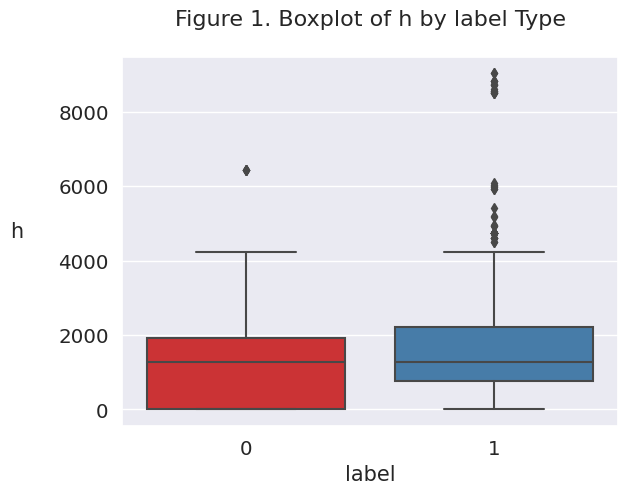

In [ ]:
sns.set(font_scale=1.3)  #sets font size for chart scales
ax = sns.boxplot(x = "label", y = "h", data = traindata, # calls the boxplot
                 palette="Set1", # sets color scheme 
                 linewidth = 1.5) # sets chart line width
_ = ax.set_title("Figure 1. Boxplot of h by label Type\n", fontsize=16) # title 
_ = ax.set_ylabel("h", rotation = 0, fontsize=15, labelpad=30) # y-axis label
_ = ax.set_xlabel("label", rotation = 0, fontsize=15) # x-axis label
plt.show()

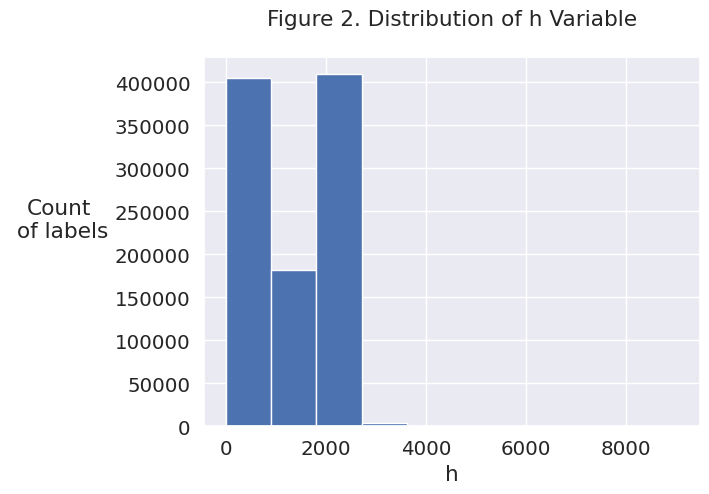

In [ ]:
_ = plt.hist(traindata['h']) # check for variable normality in h dependent variable. 
#Data looks not normally distributed.
_ = plt.title("Figure 2. Distribution of h Variable\n")
_ = plt.xlabel("h")
_ = plt.ylabel("Count\n of labels", rotation = 0, labelpad = 40)
plt.show()

In [ ]:
# check p-score of normal distribution
print(stats.normaltest(traindata['h'], axis=0))

NormaltestResult(statistic=1373260.835350655, pvalue=0.0)


Now we create an Ordinary Least Squares (OLS) model as a precursor to the ANOVA.   

Before the ANOVA, we check the OLS residuals are normally distributed. This is another important prior assumption:    
The residuals look not normal at all. Thus, we cannot run ANOVA here.  

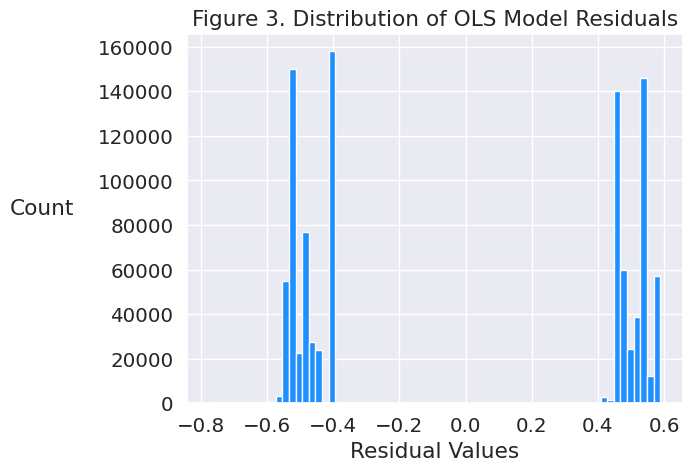

In [ ]:
anova_mod = ols("label ~ h", traindata).fit()
resids = anova_mod.resid # grabs the residual values from the OLS model
hist2 = plt.hist(resids, bins = 'auto', color='dodgerblue') # check for variable normality in weight loss dependent variable. 
#Data looks not normally distributed.
_ = plt.title("Figure 3. Distribution of OLS Model Residuals")
_ = plt.xlabel("Residual Values")
_ = plt.ylabel("Count", rotation = 0, labelpad = 40)
plt.show()

In [ ]:
# Call for ANOVA function if residuals are normally distributed.

table = sm.stats.anova_lm(anova_mod, typ=2) # Type 2 ANOVA DataFrame
print(table) 

# In a one-way ANOVA the null hypothesis is that the means of the Diet types are equal. We can reject that hypothesis
# because P < 0.05 

                 sum_sq        df            F  PR(>F)
h           2317.296084       1.0  9366.953467     0.0
Residual  247390.088680  999998.0          NaN     NaN


### 4.2 Label Encoding for non-numerical columns

In [ ]:
traindata.columns

Index(['sid', 'label', 'pkgname', 'ver', 'adunitshowid', 'mediashowid',
       'apptype', 'nginxtime', 'ip', 'city', 'province', 'reqrealip',
       'adidmd5', 'imeimd5', 'idfamd5', 'openudidmd5', 'macmd5', 'dvctype',
       'model', 'make', 'ntt', 'carrier', 'os', 'osv', 'orientation', 'lan',
       'h', 'w', 'ppi', 'income_label', 'nginxtime_clean', 'date', 'dayofweek',
       'hour', 'minute', 'hourtosecond', 'ip_top', 'reqrealip_top',
       'apptype_top1', 'apptype_top2', 'h_w', 'hw_ratio', 'inch', 'osv_clean',
       'osv_top1', 'osv_top2', 'osv_top3', 'ver_clean', 'ver_top1', 'ver_top2',
       'ver_top3'],
      dtype='object')

In [ ]:
traindata.head(10)

,sid,label,pkgname,ver,adunitshowid,mediashowid,apptype,nginxtime,ip,city,province,reqrealip,adidmd5,imeimd5,idfamd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi,income_label,nginxtime_clean,date,dayofweek,hour,minute,hourtosecond,ip_top,reqrealip_top,apptype_top1,apptype_top2,h_w,hw_ratio,inch,osv_clean,osv_top1,osv_top2,osv_top3,ver_clean,ver_top1,ver_top2,ver_top3
0,d7460126-e071-4979-9ee8-42f72777a28a-156009070...,1,2d2664e827bcbb8b07100c7fbe072e9b,11.11.0,907d0f8c29663840491577a21c7b612a,ca64a500000d84c8fcb8a0587d0e1e0c,280.0,1.560091e+12,183.197.47.83,石家庄市,Hebei,180.76.181.7,eb4fa0cf77cdd57a6993a4e42c8fa4cf,930b3a8ecff4f586c63fec5b96693f32,empty,empty,ab96caaba2b7973e63fb0d3d5c5bf8b0,2.0,V1809A,VIVO,2.0,46000.0,Android,8.1.0,0.0,zh_cn,2340.0,1080.0,3.0,low income,2019-06-09 14:31:41.087000064,9,7,14,31,143141,183,180,2,28,2527200.0,2.2,859.1,810,8,81,810,11110,1,11,111
1,b660d559-db97-4b5f-9bd2-2450cb89ce77-156005074...,1,empty,nan,10199dc8fea2e173525bc3151bd84312,3f2fc57a6e1f9c6fa4464c25cc1e88a3,319.0,1.560051e+12,106.34.14.149,开封市,Henan,47.95.111.138,a4ae6efcfaee62fb6da44a9c05753259,6e38deaa1f7b4118015c550bb21913d2,empty,a4ae6efcfaee62fb6da44a9c05753259,0f607264fc6318a92b9e13c65db7cd3c,2.0,BLA-AL00,HUAWEI,5.0,0.0,android,Android_9,0.0,nan,1080.0,2040.0,0.0,low income,2019-06-09 03:25:40.123000064,9,7,3,25,32540,106,47,3,31,2203200.0,0.5,0.0,9,9,9,9,0,0,0,0
2,f49a740e-66c3-4605-9b67-4d3079fe69cb-156008914...,0,16b81f93f4b1a35cebbf15f07683f171,3.2.1.0524.1958,83f2ecfe65f936f5f2ed59f8e8ff1d01,eea7280e1a2313e4c2e89290b01d196c,273.0,1.560089e+12,223.104.16.151,长春市,Jilin,39.96.159.155,3404f799628be2cf8fda7428aac2cca4,3fa42b06332c729f530b973973fabe3d,empty,empty,5ba1cf1efeee4f83e91f9c0adc3015e3,2.0,PBEM00,OPPO,2.0,46000.0,Android,8.1.0,1.0,zh_cn,2196.0,1080.0,0.0,low income,2019-06-09 14:05:45.217999872,9,7,14,5,140545,223,39,2,27,2371680.0,2.0,0.0,810,8,81,810,32105241958,3,32,321
3,fd60d096-f168-4540-b782-729d64d0fcc6-156006253...,0,empty,4.7.5,9f1eadd9092b19bc86ee0cacde1c867f,eec946a5a66c023ec9d3b2ede5900626,265.0,1.560063e+12,223.104.239.101,曲靖市,Yunnan,47.101.65.230,941517d46b7261d98592425672bb86f5,04420edf96dde14c357db3e83d0b2310,empty,empty,empty,2.0,M711C,MEIZU,6.0,0.0,android,7.0,0.0,nan,0.0,0.0,0.0,low income,2019-06-09 06:42:19.740000000,9,7,6,42,64219,223,47,2,26,0.0,0.0,0.0,70,7,70,70,475,4,47,475
4,a037b032-a5c7-40ea-9161-26b118b12406-156007938...,1,cf4821986014a7fef9d7b7ad8de655e4,228,2af944462e43cd2f59acbbfd37445413,57b3053174973702549ba88b6017ac30,336.0,1.560079e+12,220.152.155.170,深圳市,Guangdong,39.96.183.23,fc08a6724db4c2dcf9b5af3a4e0b6f38,23e94b65bab381bf57169149a20c0520,empty,empty,4363320019cbb7cde8b704908b673416,2.0,HUAWEI EML-AL00,HUAWEI,2.0,46000.0,Android,9,0.0,zh_cn,2244.0,1080.0,0.0,high income,2019-06-09 11:23:00.271000064,9,7,11,23,112300,220,39,3,33,2423520.0,2.1,0.0,9,9,9,9,228,2,22,228
5,7ac81a32-eefe-4fe9-9429-0ecb7be5d6b9-156006758...,1,170a88a12e36f8a0f1b73442304398b1,30928000,f67a95c5c748a5bc252d3e854f8e4977,d53d2af198ebef9544f0823c3c8e84f8,301.0,1.560068e+12,223.81.196.94,潍坊市,Shandong,39.96.159.162,empty,569f1fa33460b03d25ee4530b694a1b9,empty,empty,empty,2.0,VIVO X21I,VIVO,2.0,46000.0,Android,8.1.0,1.0,zh_cn,760.0,360.0,0.0,high income,2019-06-09 08:06:24.368000000,9,7,8,6,80624,223,39,3,30,273600.0,2.1,0.0,810,8,81,810,30928000,3,30,309
6,18deaade-64b3-4cc1-9fc8-e847f744d973-156004943...,0,b15030107319685361f4c8c0d9598cf1,nan,4f2f5735b281a22587f22fb0aaba707e,651673a5531dde9cd40f08d09d16fe70,375.0,1.560049e+12,117.175.96.33,宜宾市,Sichuan,180.163.255.199,a4655aaad9ec0e6a8b38263cf8427d98,a7a1da187c94394b4d01cd032af6b974,empty,empty,empty,0.0,OPPO A57,SMARTISAN,2.0,46000.0,android,6.0.1,0.0,nan,1280.0,720.0,0.0,low income,2019-06-09 03:03:50.219000064,9,7,3,3,30350,117,180,3,37,921600.0,1.8,0.0,601,6,60,601,0,0,0,0
7,a2d14df0-d499-4856-a330-8595f2923e21-156003109...,1,170a88a12e36f8a0f1b73442304398b1,30902000,4404268364e58fbf10c965a3bbc91924,d53d2af198ebef9544

In [ ]:
traindata_1 = traindata.loc[:,['label', 'pkgname', 'ver', 'adunitshowid', 'mediashowid',
       'apptype', 'ip', 'city', 'province', 'reqrealip',
       'adidmd5', 'imeimd5',  'openudidmd5', 'macmd5', 'dvctype',
       'model', 'make', 'ntt', 'carrier', 'os', 'osv', 'orientation', 'lan',
       'h', 'w', 'ppi', 'date', 'dayofweek', 'hour', 'minute', 'hourtosecond', 
       'ip_top', 'reqrealip_top', 'apptype_top1', 'apptype_top2', 
       'h_w', 'hw_ratio', 'inch', 'osv_clean',  'osv_top1', 'osv_top2', 'osv_top3',
       'ver_clean', 'ver_top1', 'ver_top2', 'ver_top3','income_label']]

In [ ]:
## Transform non-numerical data to numerical labels (0 to n_classes-1)
le = LabelEncoder()
for col in traindata_1.columns:
    if traindata_1[col].dtype == "object":
        traindata_1[col] = le.fit_transform(traindata_1[col])

Check new dataset with all numeric data:

In [ ]:
traindata.shape
traindata_1.shape
traindata_1.head(10)

(1000000, 51)

(1000000, 47)

,label,pkgname,ver,adunitshowid,mediashowid,apptype,ip,city,province,reqrealip,adidmd5,imeimd5,openudidmd5,macmd5,dvctype,model,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi,date,dayofweek,hour,minute,hourtosecond,ip_top,reqrealip_top,apptype_top1,apptype_top2,h_w,hw_ratio,inch,osv_clean,osv_top1,osv_top2,osv_top3,ver_clean,ver_top1,ver_top2,ver_top3,income_label
0,1,402,174,452,239,280.0,475455,229,9,5102,652267,535931,73758,199768,2.0,6202,816,2.0,46000.0,0,136,0.0,9,2340.0,1080.0,3.0,9,7,14,31,143141,183,180,2,28,2527200.0,2.2,859.1,138,8,81,810,74,1,11,111,1
1,1,2174,3180,45,61,319.0,41248,119,11,8127,456711,402019,50767,18010,2.0,602,332,5.0,0.0,1,175,0.0,6,1080.0,2040.0,0.0,9,7,3,25,32540,106,47,3,31,2203200.0,0.5,0.0,140,9,9,9,0,0,0,0,1
2,0,230,626,422,282,273.0,563455,296,17,7875,144447,232089,73758,106563,2.0,4816,572,2.0,46000.0,0,136,1.0,9,2196.0,1080.0,0.0,9,7,14,5,140545,223,39,2,27,2371680.0,2.0,0.0,138,8,81,810,1188,3,32,321,1
3,0,2174,1981,490,283,265.0,570901,152,29,8092,410702,15407,73758,279741,2.0,3618,495,6.0,0.0,1,94,0.0,6,0.0,0.0,0.0,9,7,6,42,64219,223,47,2,26,0.0,0.0,0.0,96,7,70,70,1898,4,47,475,1
4,1,1883,494,126,93,336.0,531397,195,5,7888,699055,131080,73758,78265,2.0,2185,332,2.0,46000.0,0,137,0.0,9,2244.0,1080.0,0.0,9,7,11,23,112300,220,39,3,33,2423520.0,2.1,0.0,140,9,9,9,368,2,22,228,0
5,1,231,1786,769,251,301.0,598725,207,22,7882,665070,315793,73758,279741,2.0,6393,816,2.0,46000.0,0,136,1.0,9,760.0,360.0,0.0,9,7,8,6,80624,223,39,3,30,273600.0,2.1,0.0,138,8,81,810,1027,3,30,309,0
6,0,1607,3180,231,115,375.0,254609,96,25,5079,455904,610967,73758,279741,0.0,4342,720,2.0,46000.0,1,81,0.0,6,1280.0,720.0,0.0,9,7,3,3,30350,117,180,3,37,921600.0,1.8,0.0,81,6,60,601,0,0,0,0,1
7,1,231,1347,201,251,301.0,623569,278,9,7879,665070,49204,73758,279741,2.0,770,332,2.0,46000.0,0,139,1.0,9,747.0,360.0,0.0,8,6,21,58,215815,27,39,3,30,268920.0,2.1,0.0,142,9,90,900,588,3,30,309,1
8,0,1436,3180,637,6,336.0,576544,262,7,3416,665070,876849,73758,279741,0.0,6392,816,6.0,46000.0,1,136,0.0,6,0.0,0.0,0.0,9,7,7,59,75913,223,119,3,33,0.0,0.0,0.0,138,8,81,810,0,0,0,0,1
9,1,434,2983,88,156,207.0,261491,156,6,3650,472497,745527,73758,75988,2.0,4806,572,3.0,46000.0,1,136,1.0,9,1520.0,720.0,320.0,9,7,5,21,52159,117,120,2,20,1094400.0,2.1,5.3,138,8,81,810,2802,8,82,821,1


In [ ]:
traindata_1.to_csv('round1_iflyad_anticheat_train_clean.csv', index=False)

---  End of EDA part  ---

_____

# Mobile Ad Anti-Fraud Algorithm Challenge - Modeling Part Ⅰ


-- Date:   25 Aug 2019  
-- Author:   Arianna.H

___

In [ ]:
fraud_count = (traindata["label"] == 1).sum()
non_fraud_count = (traindata["label"] == 0).sum()

# Print the counts
print("Number of fraud instances:", fraud_count)
print("Number of non-fraud instances:", non_fraud_count)

Number of fraud instances: 482894
Number of non-fraud instances: 517106


## 5.Modeling - randomforest

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  #display multiple outputs in one cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #plot
import time

from sklearn.model_selection import train_test_split  #split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('round1_iflyad_anticheat_train_clean.csv')

In [ ]:
df.shape
df.info()

(1000000, 47)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   label          1000000 non-null  int64  
 1   pkgname        1000000 non-null  int64  
 2   ver            1000000 non-null  int64  
 3   adunitshowid   1000000 non-null  int64  
 4   mediashowid    1000000 non-null  int64  
 5   apptype        1000000 non-null  float64
 6   ip             1000000 non-null  int64  
 7   city           1000000 non-null  int64  
 8   province       1000000 non-null  int64  
 9   reqrealip      1000000 non-null  int64  
 10  adidmd5        1000000 non-null  int64  
 11  imeimd5        1000000 non-null  int64  
 12  openudidmd5    1000000 non-null  int64  
 13  macmd5         1000000 non-null  int64  
 14  dvctype        1000000 non-null  float64
 15  model          1000000 non-null  int64  
 16  make           1000000 non-null  int64  
 17  ntt      

___

### Split train and validation set

In [ ]:
traindata_x = df.drop(['label'],axis=1)
traindata_y = df['label']
x_train,x_test,y_train,y_test = train_test_split(traindata_x,traindata_y,train_size=.9,random_state=20,shuffle=True)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(900000, 46) (900000,) (100000, 46) (100000,)


## 6.Tune RandomForest Model

Grid scores by RandomForest cv model:  

Best parameters set:  
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50} with F1 score 0.9336814441944133

In [ ]:
# Set the parameters by cross-validation

n_features = x_train.shape[1]

parameter_space = {
    "n_estimators": [20,50],  
    "min_samples_leaf": [2,4,6],
    'max_features':['sqrt','log2']  # try different numbers of features
}
 
scores = 'f1_macro'

# training    
print("# Tuning hyper-parameters for %s" % scores)
print()

clf = RandomForestClassifier(random_state=20, verbose=False)
grid = GridSearchCV(clf, parameter_space, cv=2, scoring='%s' % scores, n_jobs=4, verbose=False) 
grid.fit(x_train, y_train)

# print results
print("F1 scores on validation set:")
print()

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.6f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Tuning hyper-parameters for f1_macro



GridSearchCV(cv=2,
             estimator=RandomForestClassifier(random_state=20, verbose=False),
             n_jobs=4,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [20, 50]},
             scoring='f1_macro', verbose=False)

F1 scores on validation set:

0.932371 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 20}
0.933382 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}
0.932033 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 20}
0.933115 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 50}
0.931625 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 20}
0.932484 (+/-0.000) for {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 50}
0.931447 (+/-0.001) for {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 20}
0.932687 (+/-0.000) for {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 50}
0.931106 (+/-0.000) for {'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 20}
0.932321 (+/-0.000) for {'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 50}
0.930797 (+/-0.001) for {'max_features': 'log2', '

In [ ]:
print("Best parameters set:")
print('{} with F1 score {}'.format(grid.best_params_,grid.best_score_))

Best parameters set:
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50} with F1 score 0.9333818677173411


### Evaluation Metrics and performance on validation set

In [ ]:
# precision, recall, f1 score
tclf = RandomForestClassifier(random_state=20, verbose=False,max_features = "sqrt", min_samples_leaf= 2, n_estimators= 50)
tclf.fit(x_train,y_train)
y_pred = tclf.predict(x_test)

p = precision_score(y_test, y_pred, average='binary')
r = recall_score(y_test, y_pred, average='binary')
f1score = f1_score(y_test, y_pred, average='binary')
 
print('precision_score: %s'% p)
print('recall_score: %s'% r)
print('f1_score: %s'% f1score)
print()
print(classification_report(y_test, y_pred))

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=20,
                       verbose=False)

precision_score: 0.9408308942747047
recall_score: 0.9227417289661723
f1_score: 0.931698518449011

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     51578
           1       0.94      0.92      0.93     48422

    accuracy                           0.93    100000
   macro avg       0.93      0.93      0.93    100000
weighted avg       0.93      0.93      0.93    100000



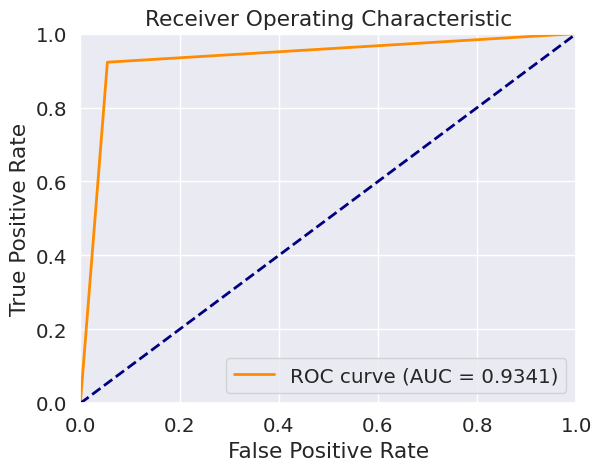

In [ ]:
# plot ROC curve
auc_value = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1.0)

_ = plt.figure()
lw = 2
_ = plt.plot(fpr, tpr, color='darkorange', linewidth=lw, label='ROC curve (AUC = %0.4f)' % auc_value)
_ = plt.plot([0, 1], [0, 1], color='navy', linewidth=lw, linestyle='--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.0])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver Operating Characteristic')
_ = plt.legend(loc="lower right")
_ = plt.show()

In [ ]:
# feature importance
features = df.columns[1:]
importances = tclf.feature_importances_
indices = np.argsort(importances)

feature_importance = pd.DataFrame()
feature_importance['features'] = features
feature_importance['importances'] = importances
feature_importance.sort_values(by='importances',ascending=False).head(10)
#feature_importance.sort_values(by='importances',ascending=False).features.head(10)

# for name, importance in zip(features, importances):
#     print(name, "=", importance)

,features,importances
35,hw_ratio,0.083515
19,osv,0.059944
38,osv_top1,0.056588
15,make,0.055030
37,osv_clean,0.051642
14,model,0.049128
13,dvctype,0.043955
3,mediashowid,0.039168
4,apptype,0.035668
0,pkgname,0.030508


____

# feature importance
features = df.columns[1:]
importances = bgbm.feature_importances_
indices = np.argsort(importances)

feature_importance = pd.DataFrame()
feature_importance['features'] = features
feature_importance['importances'] = importances
feature_importance.sort_values(by='importances',ascending=False).head(10)

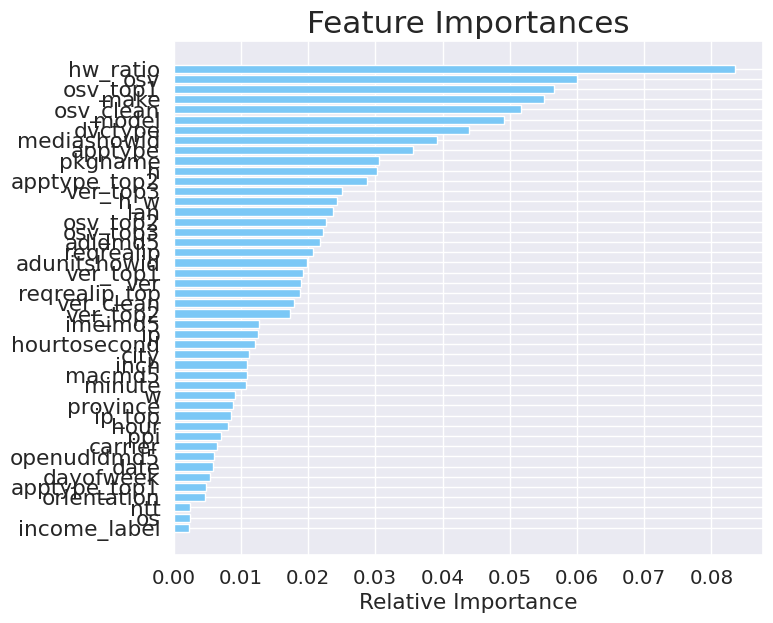

In [ ]:
# plot feature importance
fig = plt.figure()
fig.set_size_inches(8,6.5)
_ = plt.title('Feature Importances', fontsize='x-large')
_ = plt.barh(range(len(indices)), importances[indices], color='xkcd:lightblue', align='center')
_ = plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize='medium')
_ = plt.xlabel('Relative Importance')
fig.tight_layout()
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap')

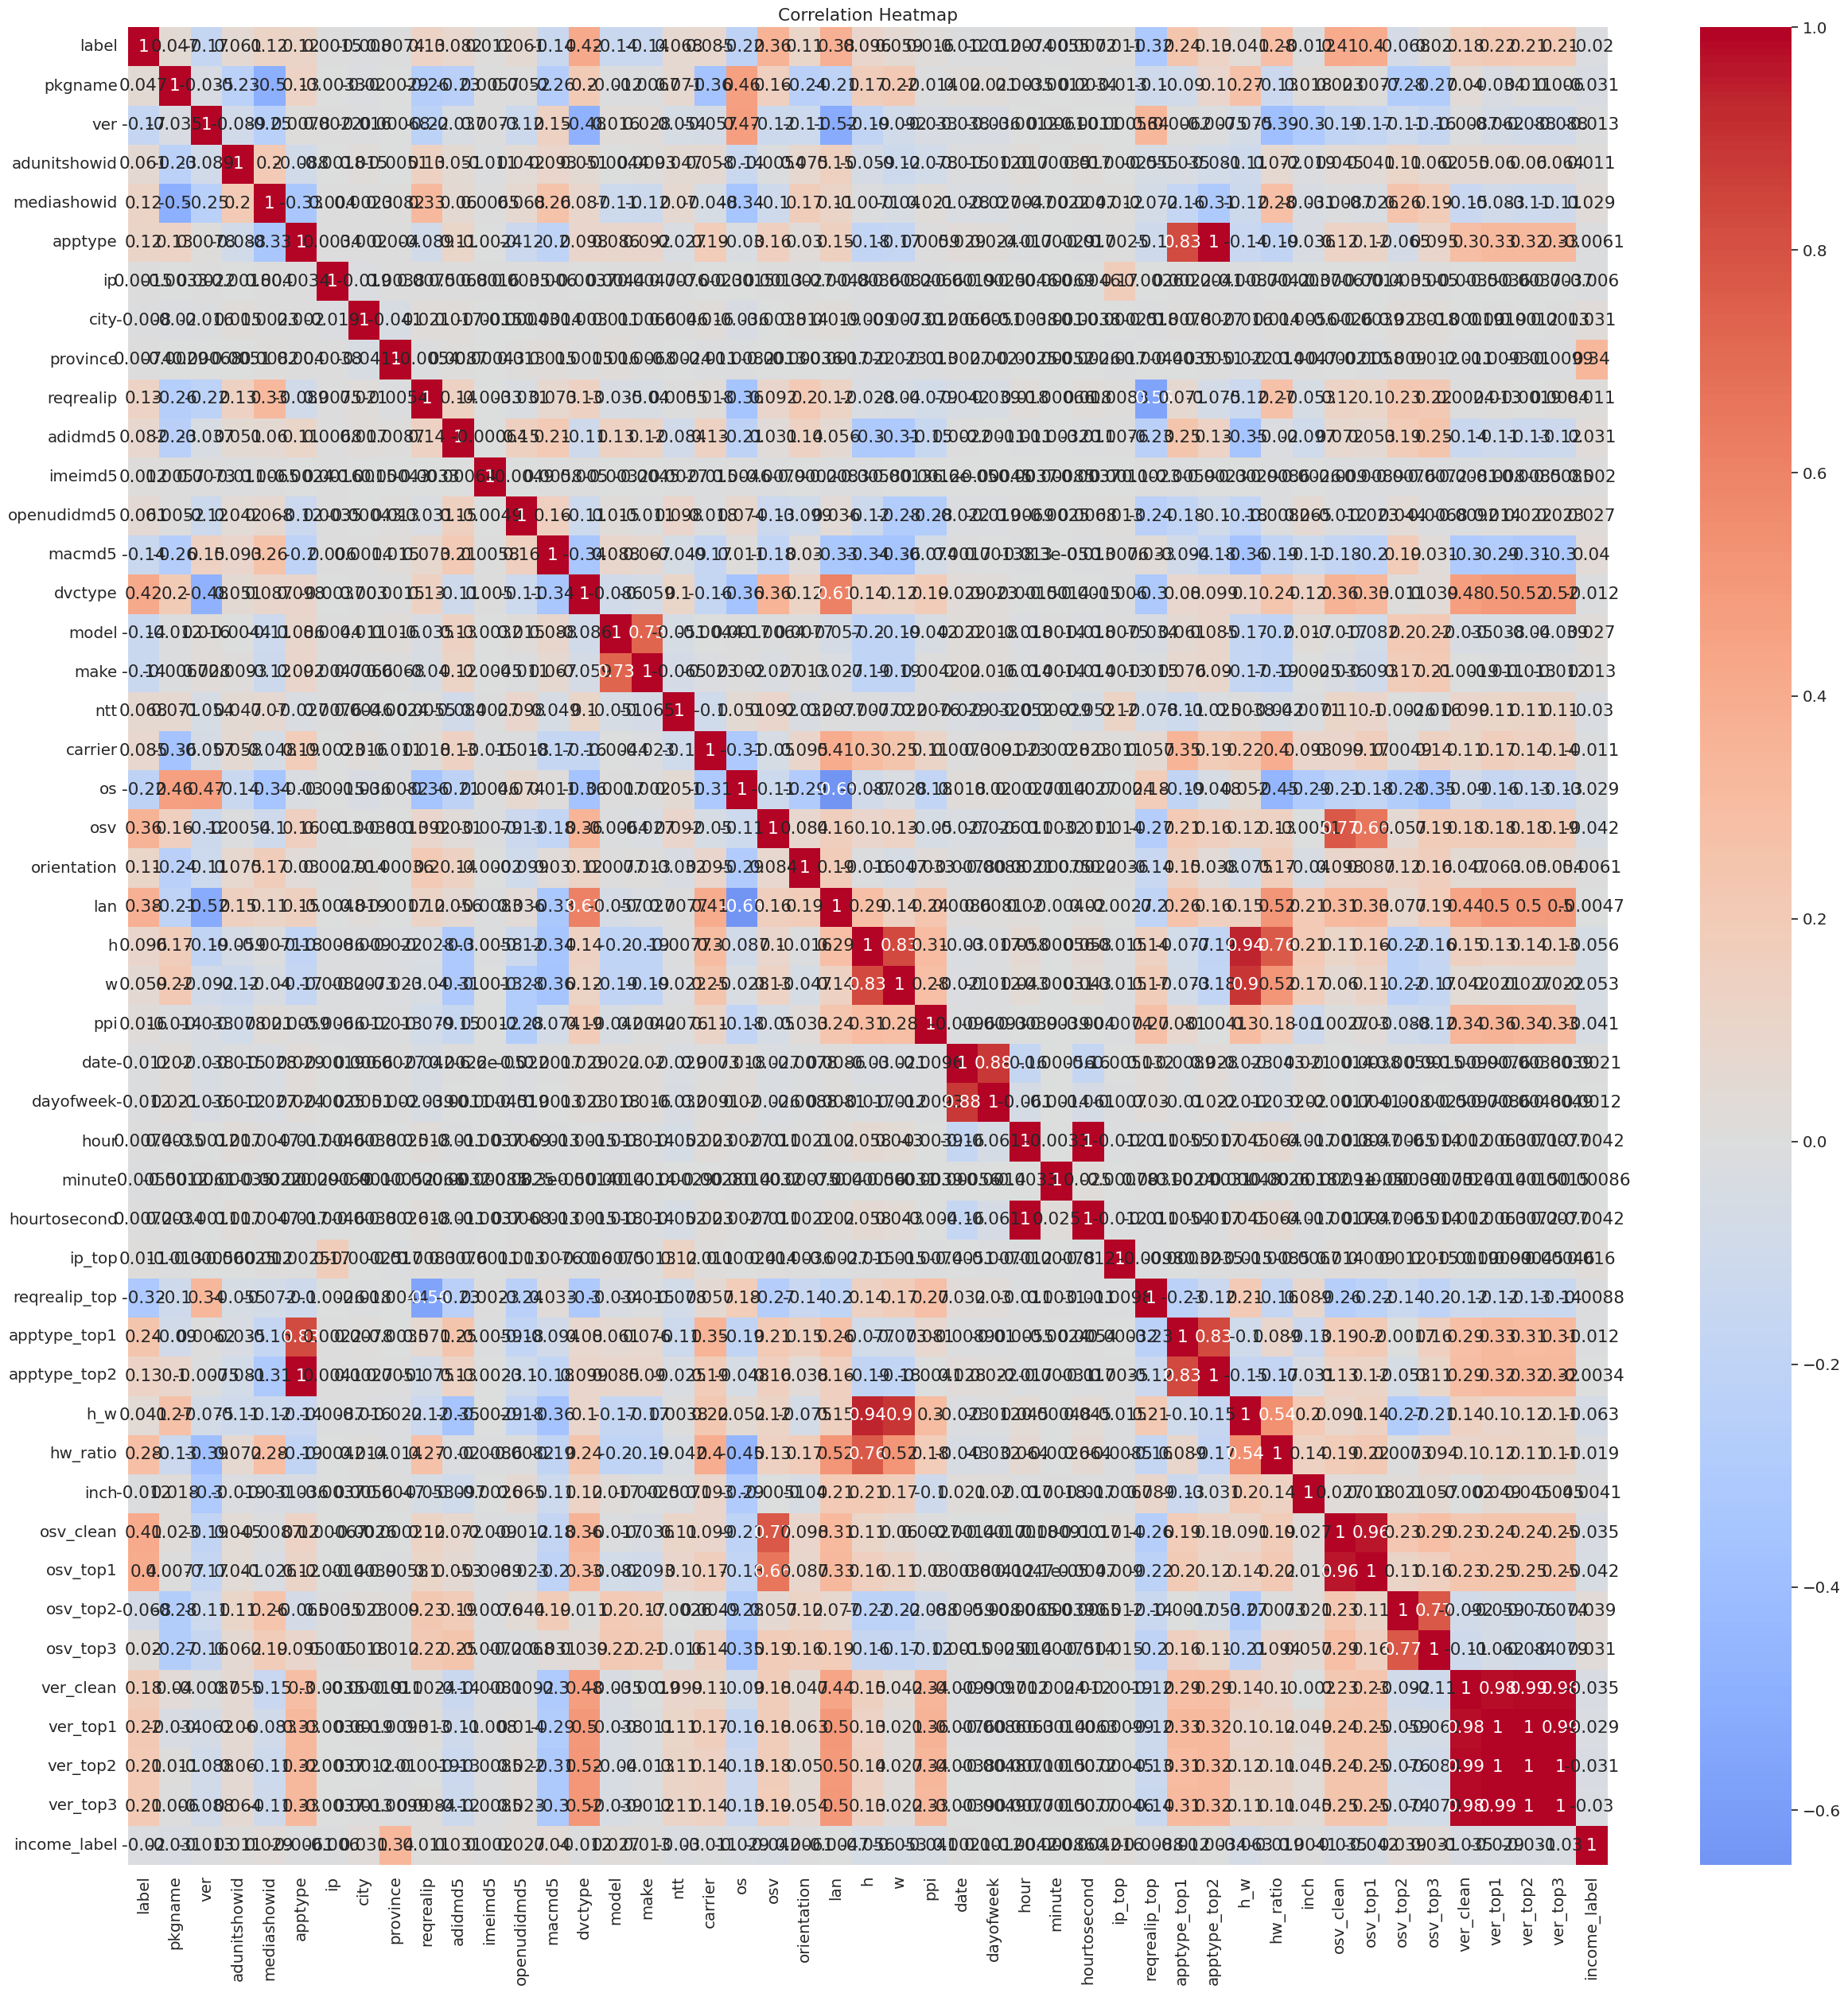

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr = traindata_1.corr()

# Set plot size
fig, ax = plt.subplots(figsize=(30, 30))

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, ax=ax)
ax.set_title('Correlation Heatmap')

plt.show()

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Distribution of Fraud and Non-Fraud Instances')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

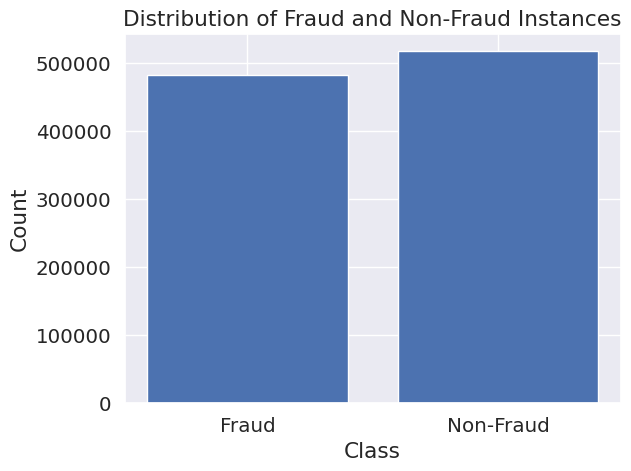

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts
fraud_count = (traindata["label"] == 1).sum()
non_fraud_count = (traindata["label"] == 0).sum()

# Create a bar plot
plt.bar(["Fraud", "Non-Fraud"], [fraud_count, non_fraud_count])
plt.title("Distribution of Fraud and Non-Fraud Instances")
plt.xlabel("Class")
plt.ylabel("Count")

# Display the plot
plt.show()

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Distribution of Income Labels')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Count')

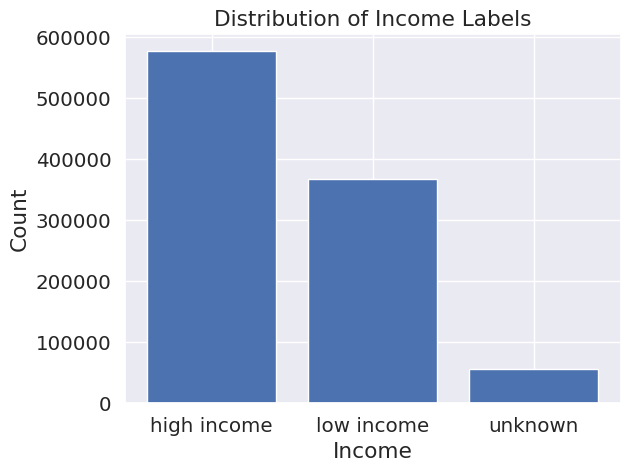

In [ ]:
income_counts = traindata["income_label"].value_counts()

# Create a bar plot
plt.bar(income_counts.index, income_counts.values)
plt.title("Distribution of Income Labels")
plt.xlabel("Income")
plt.ylabel("Count")

# Display the plot
plt.show()

# *Fairness*


Fairlearn also provides the fairlearn.metrics.MetricFrame class to evaluate disparities in treatment between different sub-populations.

The **fairlearn.metrics.MetricFrame** object requires a minimum of four arguments:

*   The underlying metric function(s) to be evaluated
*   The true values
*   The predicted values
*   The sensitive feature values

Metric functions must have a signature ''fn(y_true, y_pred)'', i.e., require only two arguments.  Here we will again look at selection rate, but we will also examine a few other metrics.  We will use accuracy, selection rate, false negative rate, and false positive rate.

In [ ]:
%%capture
#@markdown

!pip install fairlearn
!pip install folktables
!pip install seaborn
!pip install matplotlib==3.4.1 --force-reinstall
!git clone https://github.com/lurosenb/superquail

In [ ]:
#@markdown
import numpy as np
from IPython.display import display, Markdown, Latex
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.adversarial import AdversarialFairnessClassifier
from fairlearn.metrics import MetricFrame
import fairlearn.datasets as fdata
from fairlearn.metrics import (demographic_parity_difference, demographic_parity_ratio, 
                               selection_rate_difference, false_negative_rate_difference, 
                               false_positive_rate_difference, equalized_odds_ratio,
                               false_negative_rate, false_positive_rate)


from IPython.display import clear_output 


In [ ]:
sensitive_features =  x_test["income_label"]
metric_dict = {"accuracy":accuracy_score, 
               "precision": precision_score, 
               "recall": recall_score,
               "FNR": false_negative_rate, 
               "FPR": false_positive_rate,
              }

metric_frame = MetricFrame(
   metrics=metric_dict,
     y_true=y_test,
     y_pred=y_pred,
     sensitive_features = x_test["income_label"])


In [ ]:
display(metric_frame.overall)

accuracy     0.934490
precision    0.940831
recall       0.922742
FNR          0.077258
FPR          0.054481
dtype: float64

In [ ]:
display(metric_frame.by_group)

,accuracy,precision,recall,FNR,FPR
income_label,,,,,
0,0.935225,0.943543,0.924726,0.075274,0.054444
1,0.932716,0.935280,0.918230,0.081770,0.054792
2,0.938522,0.946715,0.929749,0.070251,0.052651


<AxesSubplot:xlabel='income_label'>

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

Text(0.5, 0, 'Income Label')

Text(0, 0.5, 'Metric Value')

Text(0.5, 1.0, 'Comparison of Metrics by Group')

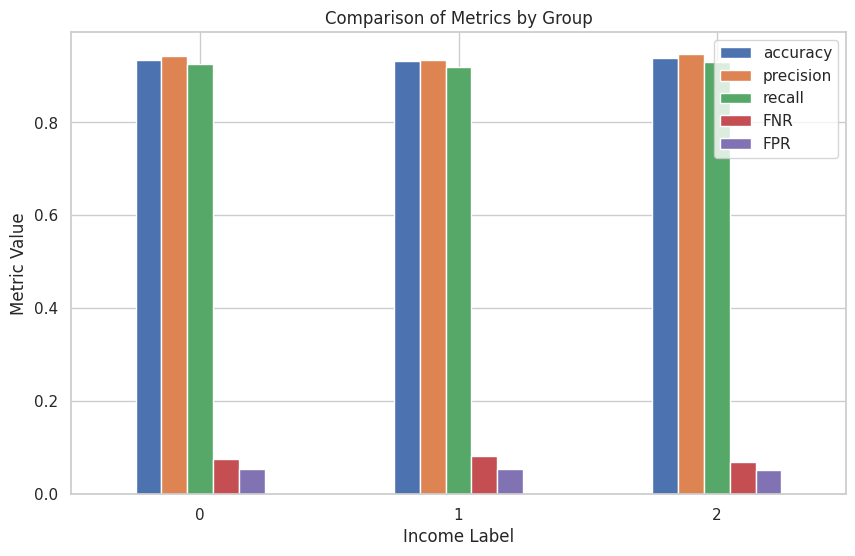

In [197]:

metric_pivot = metric_frame.by_group

# Plot the metrics
sns.set(style="whitegrid")
metric_pivot.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel('Income Label')
plt.ylabel('Metric Value')
plt.title('Comparison of Metrics by Group')
plt.show()

accuracy_frame = metric_frame.by_group['accuracy']


Next, we will evaluate the fairness of our classifier on the test set. We first define the **selection rate** of the classifier on a group:
$$
\text{Selection Rate} = \frac{\text{Number of People Classified Positive}}{\text{Total Number of People}}
$$
We will compute the selection rate amongst men and amongst women, and compare them. The difference of their selection rates is called the **Demographic parity difference**, and the ratio of their rates is called the **Demographic parity ratio**.

In general, if we have more than 2 classes,
- The demographic parity difference is the difference of the largest and smallest selection rates, so it is always positive. A demographic parity difference of 0 means that all groups have the same selection rate.

- The demographic parity ratio is the ratio of the smallest to largest selection rates, so it is always between 0 and 1, where a ratio of 1 means that all groups have the same selection rate.

<!-- Next, we will evaluate the fairness of our classifier on the test set.  We will first focus on two metrics - demographic parity difference and demographic parity ratio.  **Demographic parity difference** is defined as the difference between the largest and the smallest group-level selection rate across all values of the sensitive feature(s).  A demographic parity difference of 0 means that all groups have the same selection rate.  **Demographic parity ratio** is defined as the ratio between the smallest and the largest group-level selection rate across all values of the sensitive feature(s).  A demographic parity ratio of 1 means that all groups have the same selection rate. -->

More formally: let $X$ denote a feature vector used for predictions, $A$ be a single sensitive feature (such as age or race), $Y$ be the true label, and $h$ a classifier or predictor resulted from a Machine Learning algorithm. Then:

*Demographic Parity Difference* is defined as $(max_a\mathbb{E}[h(X)~|~  A = a])~ - ~ (min_a\mathbb{E}[h(X)~|~  A = a]) $


*Demographic Parity Ratio* is defined as $\frac{max_a\mathbb{E}[h(X)~|~  A = a]}{min_a\mathbb{E}[h(X)~|~  A = a]} $

In [ ]:

sensitive_features = (x_test["income_label"] <= 1).astype(int)
metric_dict = {
               "FNR difference":false_negative_rate_difference, 
           "FPR difference":false_positive_rate_difference, 
           "demographic_parity_ratio":demographic_parity_ratio,
           "equalized_odds_ratio":equalized_odds_ratio, 
           "selection_rate_difference":selection_rate_difference,
          }


sample_para = {
        'FNR difference': {'sensitive_features': sensitive_features},
        'FPR difference': {'sensitive_features': sensitive_features},
       'demographic_parity_ratio': {'sensitive_features': sensitive_features},
      'equalized_odds_ratio':{'sensitive_features': sensitive_features},
      'selection_rate_difference':{'sensitive_features': sensitive_features},

    }
metric_frame_2 = MetricFrame(
   metrics=metric_dict,
     y_true=y_test,
     y_pred=y_pred,
     sensitive_features = sensitive_features,
     sample_params = sample_para)
display(metric_frame_2.overall)

FNR difference               0.007436
FPR difference               0.001934
demographic_parity_ratio     0.962097
equalized_odds_ratio         0.964569
selection_rate_difference    0.018669
dtype: float64

#4. Train "Blind"

In [ ]:
# @markdown Remove sensitive attribute from data
X_train_blind = x_train.drop(columns='income_label')
X_test_blind = x_test.drop(columns='income_label')

In [ ]:
aclf = RandomForestClassifier(random_state=20, verbose=False,max_features = "sqrt", min_samples_leaf= 2, n_estimators= 50)
aclf.fit(X_train_blind,y_train)


p = precision_score(y_test, y_pred, average='binary')
r = recall_score(y_test, y_pred, average='binary')
f1score = f1_score(y_test, y_pred, average='binary')
 
print('precision_score: %s'% p)
print('recall_score: %s'% r)
print('f1_score: %s'% f1score)
print()
print(classification_report(y_test, y_pred))

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=20,
                       verbose=False)

precision_score: 0.9408308942747047
recall_score: 0.9227417289661723
f1_score: 0.931698518449011

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     51578
           1       0.94      0.92      0.93     48422

    accuracy                           0.93    100000
   macro avg       0.93      0.93      0.93    100000
weighted avg       0.93      0.93      0.93    100000



In [ ]:
y_pred = tclf.predict(x_test)

In [ ]:
# @markdown Evaluate fairness of the blind classifier

#compute test predictions

y_pred_blind = aclf.predict(X_test_blind)


# Compute demographic parity difference and demographic parity ratio
demo_parity_diff_blind = demographic_parity_difference(y_test, y_pred_blind, sensitive_features=x_test['income_label'])
demo_parity_ratio_blind = demographic_parity_ratio(y_test, y_pred_blind, sensitive_features=x_test['income_label'])

print(f'Demographic parity difference (without sensitive attribute): {demo_parity_diff_blind:.4f}')
print(f'Demographic parity ratio (without sensitive attribute): {demo_parity_ratio_blind:.4f}')


# Compute selection rate for high and low income groups
high_income_selection_rate_blind = selection_rate(y_test[x_test['income_label']==0], y_pred_blind[x_test['income_label']==0]) 
low_income_selection_rate_blind = selection_rate(y_test[x_test['income_label']==1], y_pred_blind[x_test['income_label']==1])

print(f'High income selection rate: {high_income_selection_rate_blind:.4f}')
print(f'Low income selection rate: {low_income_selection_rate_blind:.4f}')



Demographic parity difference (without sensitive attribute): 0.0411
Demographic parity ratio (without sensitive attribute): 0.9172
High income selection rate: 0.4858
Low income selection rate: 0.4552


In [ ]:
_# @markdown Evaluate the biases of the classifier using the MetricFrame class
grouped_on_income_blind = MetricFrame(metrics=metric_dict,
                                     y_true=y_test,
                                     y_pred=y_pred_blind,
                                     sensitive_features=sensitive_feature_income,
                                      sample_params = sample_para)

Text(0.5, 30.0, 'Relative Importance')

In [ ]:
# @markdown
grouped_on_income_blind.overall

FNR difference               0.012886
FPR difference               0.000033
demographic_parity_ratio     0.954886
equalized_odds_ratio         0.986226
selection_rate_difference    0.022391
dtype: float64

## **Showing all the metrics for the full data and blinded data.**

Text(0.5, 1.0, 'Metrics Comparison')

[Text(0, 0, 'Demo Parity Diff'),
 Text(1, 0, 'Demo Parity Ratio'),
 Text(2, 0, 'Sel Rate (Male)'),
 Text(3, 0, 'Sel Rate (Female)'),
 Text(4, 0, 'FNR (Male)'),
 Text(5, 0, 'FNR (Female)'),
 Text(6, 0, 'FPR(Male)'),
 Text(7, 0, 'FPR(Female)')]

[Text(0, 3, '0.038'),
 Text(0, 3, '0.923'),
 Text(0, 3, '0.486'),
 Text(0, 3, '0.455'),
 Text(0, 3, '0.075'),
 Text(0, 3, '0.082'),
 Text(0, 3, '0.054'),
 Text(0, 3, '0.055')]

[Text(0, 3, '0.041'),
 Text(0, 3, '0.917'),
 Text(0, 3, '0.486'),
 Text(0, 3, '0.455'),
 Text(0, 3, '0.075'),
 Text(0, 3, '0.081'),
 Text(0, 3, '0.054'),
 Text(0, 3, '0.055')]

(0.0, 1.0)

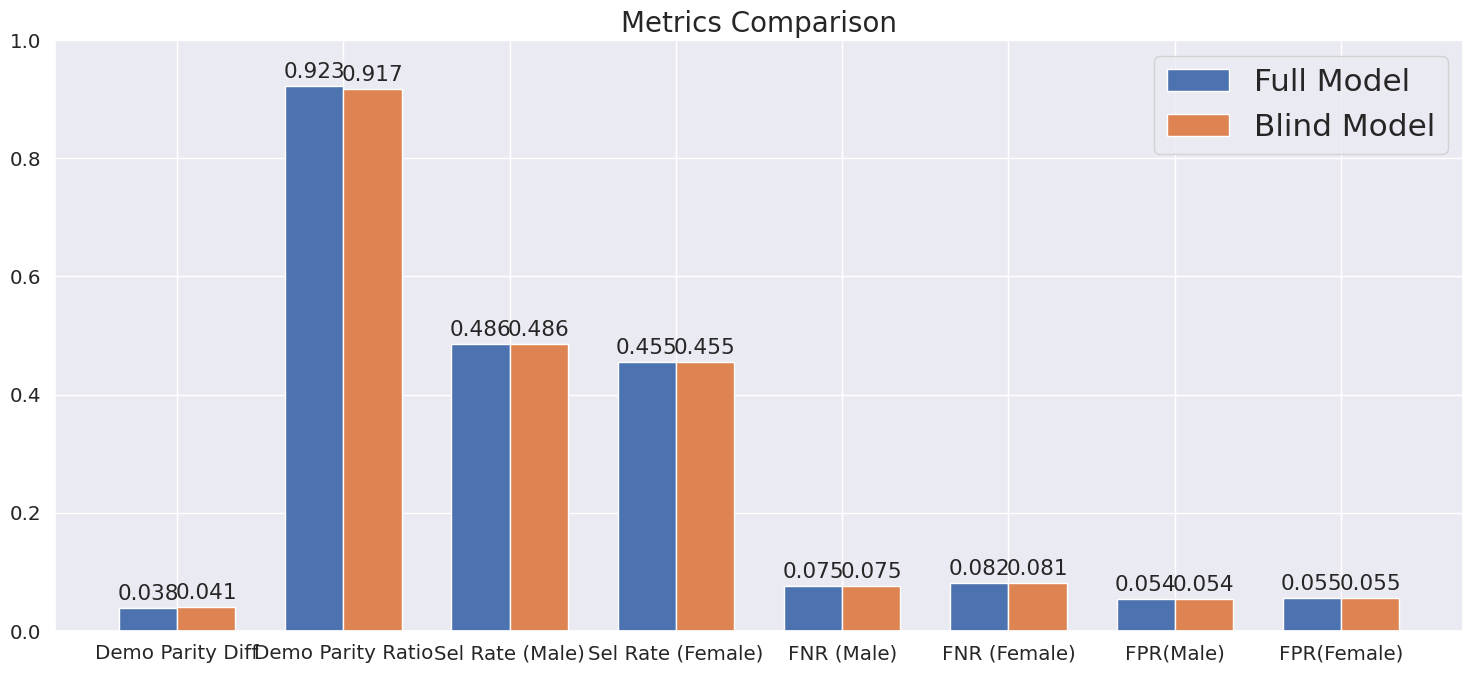

In [ ]:
# @markdown Comparing the results: full-data vs. blinded data

#demographic parity difference
demo_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=x_test['income_label'])
demo_parity_diff_blind = demographic_parity_difference(y_test, y_pred_blind, sensitive_features=x_test['income_label'])

#demographic parity ratio
demo_parity_ratio = demographic_parity_ratio(y_test, y_pred, sensitive_features=x_test['income_label'])
demo_parity_ratio_blind = demographic_parity_ratio(y_test, y_pred_blind, sensitive_features=x_test['income_label'])

#selection rate
high_income_selection_rate = selection_rate(y_test[x_test['income_label']==0], y_pred[x_test['income_label']==0])
high_income_selection_rate_blind = selection_rate(y_test[x_test['income_label']==0], y_pred_blind[x_test['income_label']==0])

low_income_selection_rate = selection_rate(y_test[x_test['income_label']==1], y_pred[x_test['income_label']==1])
low_income__selection_rate_blind = selection_rate(y_test[x_test['income_label']==1], y_pred_blind[x_test['income_label']==1])

#fnr
low_income_fnr = false_negative_rate(y_test[x_test['income_label']==1], y_pred[x_test['income_label']==1])
low_income_fnr_blind = false_negative_rate(y_test[x_test['income_label']==1], y_pred_blind[x_test['income_label']==1])

high_income_fnr = false_negative_rate(y_test[x_test['income_label']==0], y_pred[x_test['income_label']==0])
high_income_fnr_blind = false_negative_rate(y_test[x_test['income_label']==0], y_pred_blind[x_test['income_label']==0])

#fpr
low_income_fpr = false_positive_rate(y_test[x_test['income_label']==1], y_pred[x_test['income_label']==1])
low_income_fpr_blind = false_positive_rate(y_test[x_test['income_label']==1], y_pred_blind[x_test['income_label']==1])

high_income_fpr = false_positive_rate(y_test[x_test['income_label']==0], y_pred[x_test['income_label']==0])
high_income_fpr_blind = false_positive_rate(y_test[x_test['income_label']==0], y_pred_blind[x_test['income_label']==0])

#plot
labels = ['Demo Parity Diff','Demo Parity Ratio','Sel Rate (Male)',
          'Sel Rate (Female)', 'FNR (Male)', 'FNR (Female)', 'FPR(Male)',
          'FPR(Female)']

Y_full = [demo_parity_diff, demo_parity_ratio, high_income_selection_rate, 
          low_income_selection_rate, high_income_fnr, low_income_fnr, high_income_fpr, low_income_fpr]

Y_blind = [demo_parity_diff_blind, demo_parity_ratio_blind, 
           high_income_selection_rate_blind, low_income_selection_rate_blind, high_income_fnr_blind, 
           low_income_fnr_blind, high_income_fpr_blind, low_income_fpr_blind]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Y_full, width, label='Full Model')
rects2 = ax.bar(x + width/2, Y_blind, width, label='Blind Model')

ax.set_title('Metrics Comparison', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize='x-large')
ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')
ax.set_ylim([0, 1])
fig.tight_layout()
plt.rcParams["figure.figsize"] = (18,8)
plt.show()
